In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [9]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Univariate Analysis #

In [19]:
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')
df['Sex'].value_counts().plot(kind='bar', title='Gender Count')
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Count')

<Axes: title={'center': 'Passenger Class Count'}, xlabel='Pclass'>

Observations 
- The number of passengers who did not survive is significantly higher than those who did.
- Most passengers in this dataset perished.
- There were more male passengers than female passengers.
- Majority of passengers belonged to third class.
- first class passengers were the fewest, indicating socioeconomic differences.

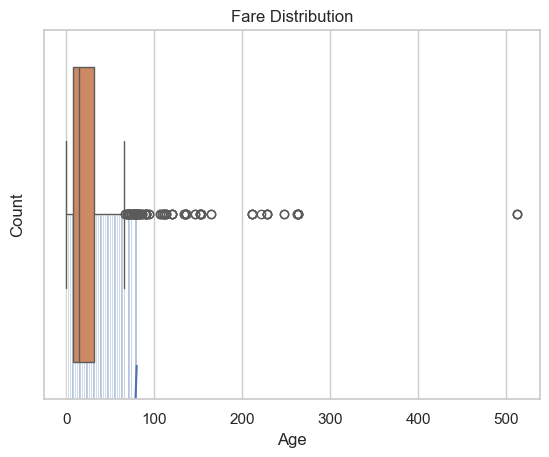

In [62]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()

**Observation:**
- Most passengers were between 20 and 40 years old.
- Very few were above 60 or below 10.

# Bivariate analysis #

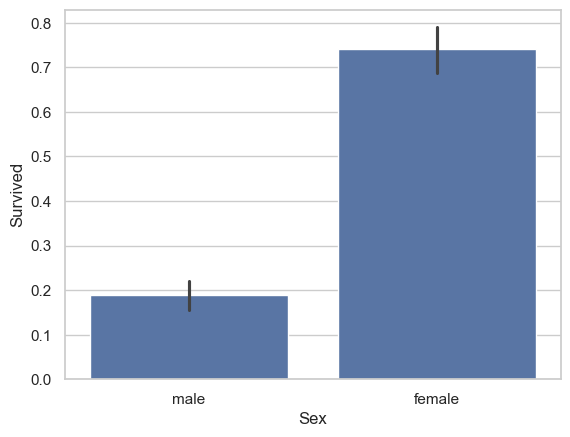

In [33]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

**Observation:**
- Females had a significantly higher survival rate compared to males.
- Being female was a major factor in survival.

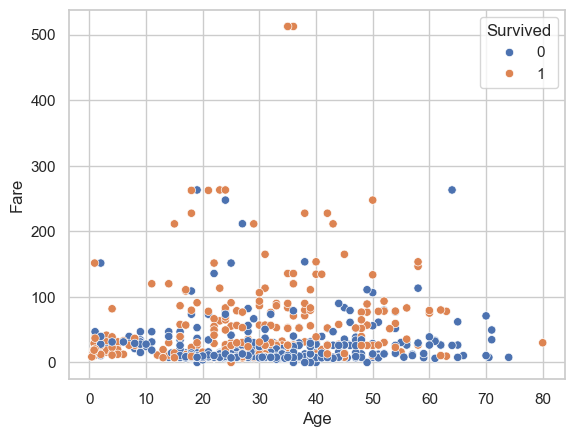

In [35]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.show()

**Observation:**
- Survivors are mostly clustered in lower fares and mid-age group.
- Some high-fare passengers survived regardless of age.

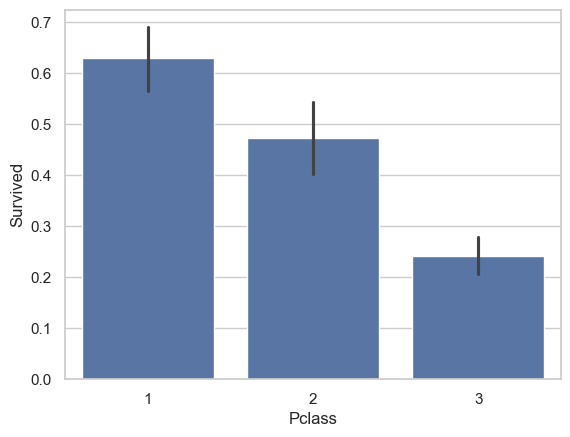

In [37]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

**Observation:**
- Passengers in 1st class had the highest survival rate.
- Passengers in 3rd class had the lowest survival rate.

# correlation heatmap #

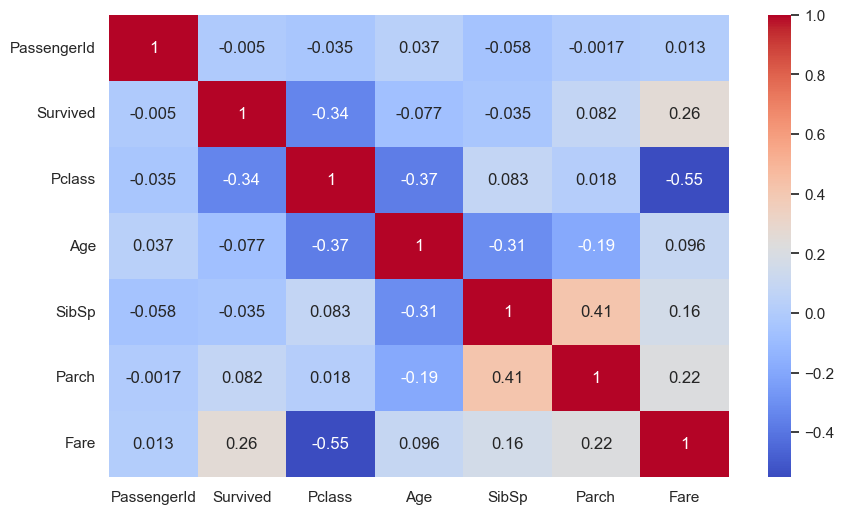

In [40]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Observation:**
- Survival has a moderate positive correlation with 'Fare' and negative correlation with 'Pclass'.
- 'Pclass' and 'Fare' are strongly correlated with each other.

# pairplot #

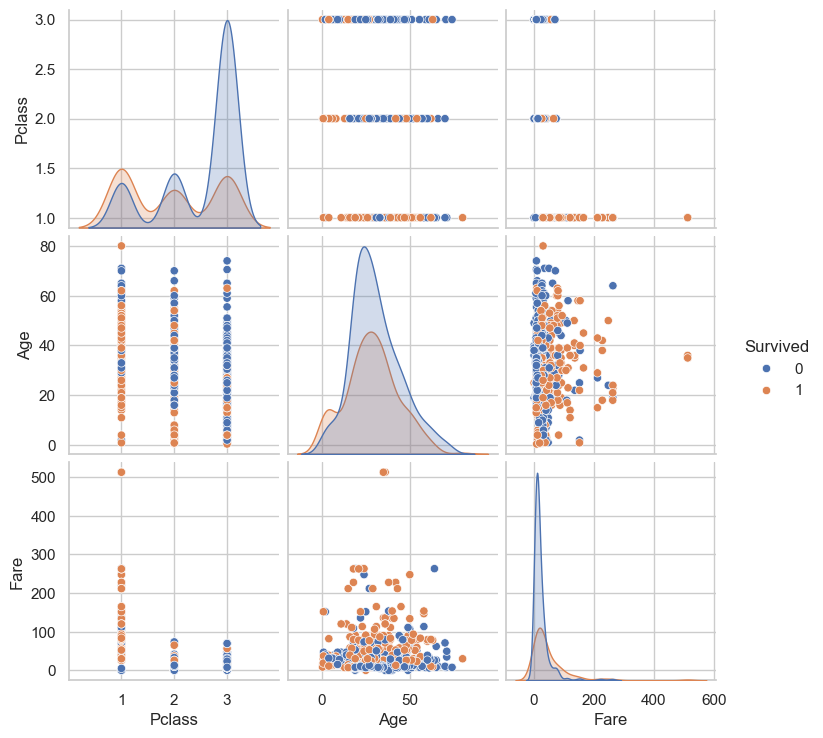

In [42]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

**Observation:**
- Clear visual separation between 1st class and 3rd class in terms of survival.
- Survivors mostly paid higher fares and were in higher classes.

In [47]:
df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

df.dropna(subset=['Embarked'], inplace=True)

**Summary of Findings:**

- Females had higher survival rates.
- Higher class passengers (Pclass=1) survived more.
- Age, Sex, and Pclass show influence on survival.
- Fare varies a lot; some outliers exist.